In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [6]:
df=pd.read_csv('titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [9]:
x=df.drop(columns=['Survived'])
y=df['Survived']


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [13]:
x_train['age_99']=x_train['Age'].fillna(99)
x_train['age_minus1']=x_train['Age'].fillna(-1)

x_train['fare_999']=x_train['Fare'].fillna(999)
x_train['fare_minus1']=x_train['Fare'].fillna(-1)


In [23]:
print('original var age:',x_train['Age'].var())
print('var after 99 imputation of age:',x_train['age_99'].var())
print('var after minus1 imputation of age:',x_train['age_minus1'].var())

print('origina var fare:',x_train['Fare'].var())
print("var after 99 imputation of fare",x_train['fare_999'].var())
print('var afte rminueb1 fare',x_train['fare_minus1'].var())


original var age: 204.34951339046142
var after 99 imputation of age: 951.7275570187188
var after minus1 imputation of age: 318.0896202624488
origina var fare: 2448.1979137063163
var after 99 imputation of fare 47219.202652176304
var afte rminueb1 fare 2378.5676784883494


<AxesSubplot: ylabel='Density'>

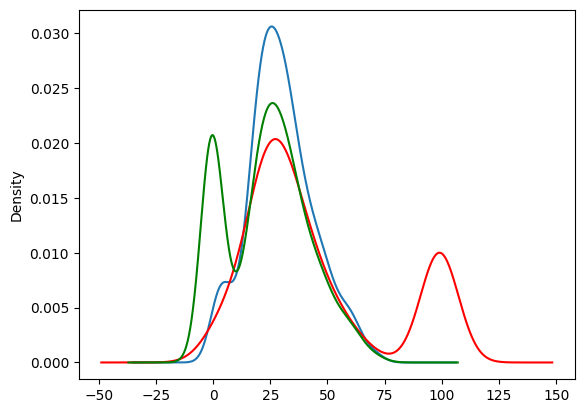

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['age_99'].plot(kind='kde',ax=ax,color='red')
x_train['age_minus1'].plot(kind='kde',ax=ax,color='green')

<AxesSubplot: ylabel='Density'>

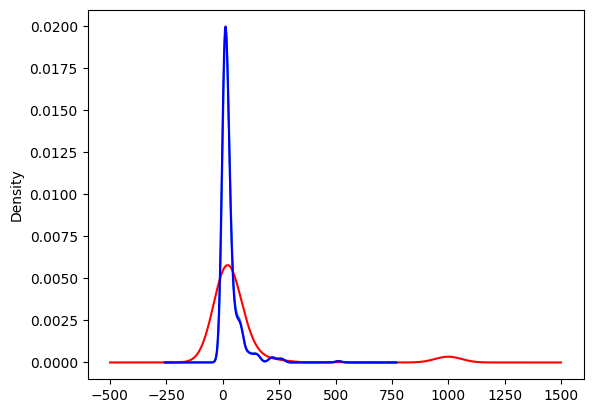

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['fare_999'].plot(kind='kde',ax=ax,color='red')
x_train['fare_minus1'].plot(kind='kde',ax=ax,color='blue')

In [39]:
x_train.cov()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [40]:
x_train.corr()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=-1)

In [50]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
])

In [51]:
trf.fit(x_train)

ColumnTransformer(transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [53]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [54]:
trf.named_transformers_['imputer2'].statistics_

array([-1.])

In [55]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [56]:
x_train

array([[ 40.    ,  27.7208],
       [  4.    ,  16.7   ],
       [ 47.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042],
       [ 99.    , 221.7792],
       [ 99.    ,  25.925 ]])